In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import xarray as xr
import glob

In [2]:
path_jan = '/Volumes/Seagate Backup Plus Drive/12843_A202101/csv_files/combined/'

path_feb = '/Volumes/Seagate Backup Plus Drive/12843_A202102/csv_files/combined/'

path_oct = '/Volumes/Seagate Backup Plus Drive/12843_A202010/csv_files/combined/'

path_nov = '/Volumes/Seagate Backup Plus Drive/12843_A202011/csv_files/combined/'

path_dec = '/Volumes/Seagate Backup Plus Drive/12843_A202012/csv_files/combined/'

path_mar = '/Volumes/Seagate Backup Plus Drive/12843_A202103/'

In [3]:
dfjan = xr.open_dataset(path_jan   + 'ceilo_jan.nc')
dffeb = xr.open_dataset(path_feb   + 'ceilo_feb.nc')
dfmar = xr.open_dataset(path_mar + 'ceilo_mar.nc')
dfoct = xr.open_dataset(path_oct   + 'ceilo_oct.nc')
dfnov = xr.open_dataset(path_nov   + 'ceilo_nov.nc')
dfdec = xr.open_dataset(path_dec   + 'ceilo_dec.nc')

In [4]:
dffeb

<xarray.Dataset>
Dimensions:         (time: 40319, range: 1535, range_hr: 32, layer: 3)
Coordinates:
  * time            (time) datetime64[ns] 2021-02-01T00:00:42 ... 2021-02-28T...
  * range           (range) float32 14.98 24.98 34.97 ... 1.533e+04 1.534e+04
  * range_hr        (range_hr) float32 0.001 4.995 9.99 ... 144.9 149.9 154.8
  * layer           (layer) int32 1 2 3
Data variables: (12/41)
    latitude        (time) float32 ...
    longitude       (time) float32 ...
    azimuth         (time) float32 ...
    zenith          (time) float32 ...
    altitude        (time) float32 ...
    wavelength      (time) float32 ...
    ...              ...
    cdp             (time, layer) int16 ...
    cde             (time, layer) int16 ...
    cho             (time) int16 ...
    nn1             (time) int16 ...
    nn2             (time) int16 ...
    nn3             (time) int16 ...
Attributes: (12/15)
    title:             CHM15k Nimbus
    source:            CHM150158
    device_name:       CHM150158
    serlom:            TUB150059
    day:               1
    month:             2
    ...                ...
    wmo_id:            12843
    wigos_id:          
    netcdf_mode:       2
    software_version:  15.12.1 2.13 1.070 0
    comment:           
    overlap_file:      TUB150059 (2016-01-19 08:24:22)

(0.0, 500.0)

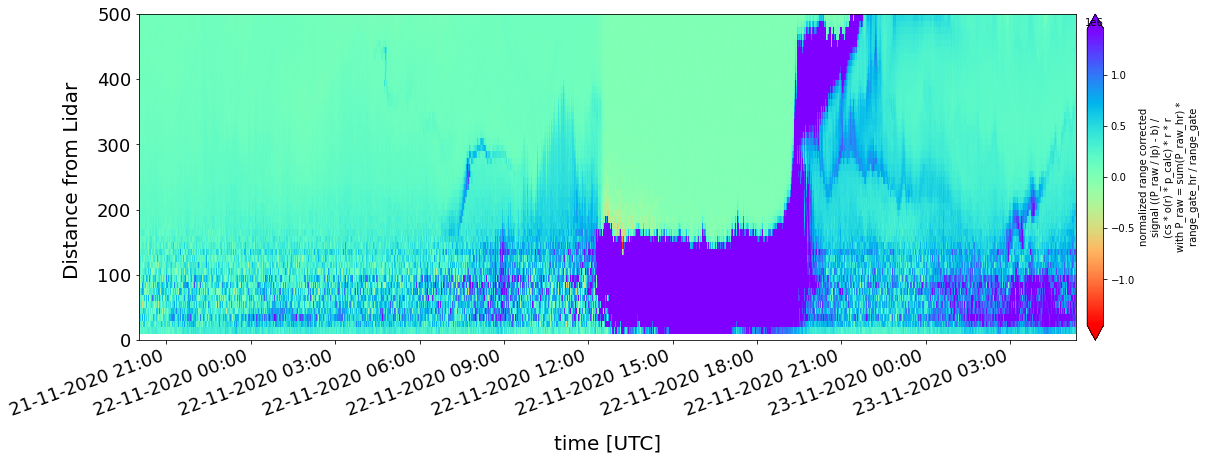

In [5]:
# Plot data
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
fig, ax1  = plt.subplots(1, 1, figsize=(20, 6))
dfnov.beta_raw[30000:32000].plot(ax=ax1, x = 'time', cbar_kwargs={"spacing": "proportional", "orientation": "vertical",
        "pad": 0.01,}, robust = True, cmap = 'rainbow_r')
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y %H:%M"))
#ax1.xaxis.set_major_locator(DayLocator(interval= 7))
ax1.set_ylabel('Distance from Lidar ', fontsize=20, labelpad =15 )
ax1.set_xlabel('time [UTC]', fontsize=20, labelpad =15 )
ax1.set_ylim([0,500])
#ax1.set_yticks(np.arange(0,501,50))

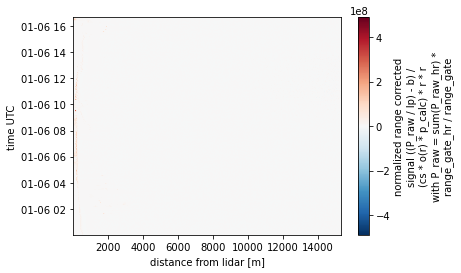

In [6]:
xr.plot.pcolormesh(dfjan['beta_raw'][7200:8200])

In [7]:
dfjan.beta_raw[7200:7205]

<xarray.DataArray 'beta_raw' (time: 5, range: 1535)>
array([[  50567.74 ,  428424.16 ,  259733.94 , ...,   28766.389,  206549.62 ,
          97294.33 ],
       [ 149047.58 ,  326134.03 ,  314985.4  , ...,  418472.62 ,  -25956.904,
        -248768.55 ],
       [ 140056.4  ,  395585.16 ,  454641.12 , ...,  950289.94 , 1176699.5  ,
        -230911.97 ],
       [ 381809.4  ,  605383.7  ,  671900.9  , ...,  907426.8  ,  175473.7  ,
         578733.8  ],
       [ 205361.86 ,  211212.89 ,  617956.56 , ..., -346723.2  ,  534051.7  ,
        -725789.4  ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-06T00:01:04 ... 2021-01-06T00:05:04
  * range    (range) float32 14.98 24.98 34.97 ... 1.532e+04 1.533e+04 1.534e+04
Attributes:
    units:      
    long_name:  normalized range corrected signal\n((P_raw / lp) - b) / (cs *...

In [8]:
31*24*60

44640

In [9]:
6*24*60

8640